In [1]:
# !pip install tensorflow
# !pip install matplotlib

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
import os
print("Current Dir",os.getcwd())
curr_dir=os.getcwd()
train_path=os.path.join(curr_dir,"datasets","Train")
test_path=os.path.join(curr_dir,"datasets","Test")
valid_path=os.path.join(curr_dir,"datasets","Valid")

Current Dir e:\potato_disease_project


In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [6]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 300 files belonging to 3 classes.


In [9]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))


c:\Users\Surendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy']
)

In [11]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
trainig_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


29/29 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.3653 - loss: 1.6153 - val_accuracy: 0.5833 - val_loss: 1.0151
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.4952 - loss: 0.9703 - val_accuracy: 0.6367 - val_loss: 0.7513
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.6675 - loss: 0.6566 - val_accuracy: 0.8000 - val_loss: 0.4687
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.8031 - loss: 0.4701 - val_accuracy: 0.8333 - val_loss: 0.3806
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.8519 - loss: 0.3786 - val_accuracy: 0.9000 - val_loss: 0.2450
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.9034 - loss: 0.2281 - val_accuracy: 0.7867 - val_loss: 0.4622
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.8284 - loss: 0.4116 - val_accuracy: 0.8567 - val_loss: 0.3287
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.8864 - loss: 0.2593 - val_accuracy: 0.9167 - val_loss: 0.2062
Epo

In [13]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 555ms/step - accuracy: 0.9735 - loss: 0.0773
Training accuracy: 0.9777777791023254


In [14]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 437ms/step - accuracy: 0.9376 - loss: 0.1646
Validation accuracy: 0.9366666674613953


In [15]:
cnn.save('trained_plant_disease_model.keras')

In [17]:
trainig_history.history

{'accuracy': [0.36666667461395264,
  0.5455555319786072,
  0.70333331823349,
  0.801111102104187,
  0.8633333444595337,
  0.898888885974884,
  0.852222204208374,
  0.898888885974884,
  0.9388889074325562,
  0.9544444680213928],
 'loss': [1.3206514120101929,
  0.8960481286048889,
  0.5977213978767395,
  0.45934155583381653,
  0.3625495731830597,
  0.255069762468338,
  0.36566847562789917,
  0.23479099571704865,
  0.18077155947685242,
  0.11306292563676834],
 'val_accuracy': [0.5833333134651184,
  0.6366666555404663,
  0.800000011920929,
  0.8333333134651184,
  0.8999999761581421,
  0.7866666913032532,
  0.8566666841506958,
  0.9166666865348816,
  0.9300000071525574,
  0.9366666674613953],
 'val_loss': [1.0151124000549316,
  0.7513015866279602,
  0.46869415044784546,
  0.38062602281570435,
  0.24499836564064026,
  0.46222731471061707,
  0.328669935464859,
  0.20615842938423157,
  0.16858361661434174,
  0.1763990968465805]}

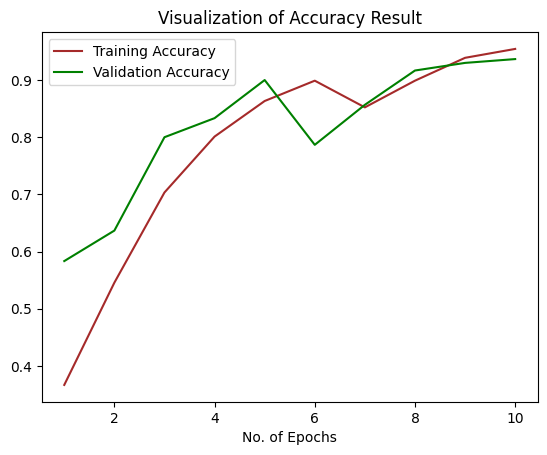

In [19]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,trainig_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,trainig_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()